### Random sample imputation

In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
pd.set_option('Display.max_rows', None)
df

,Survived,Age,Fare
0,0,22.00,7.2500
1,1,38.00,71.2833
2,1,26.00,7.9250
3,1,35.00,53.1000
4,0,35.00,8.0500
5,0,NaN,8.4583
6,0,54.00,51.8625
7,0,2.00,21.0750
8,1,27.00,11.1333
9,1,14.00,30.0708


In [39]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [40]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [41]:
df['Age'].isnull().sum()

177

In [42]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [43]:
random = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

In [44]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [45]:
median = df.Age.mean()
median

29.69911764705882

In [46]:
impute_nan(df,"Age",median)

In [47]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.00,7.2500,22.000000,22.00
1,1,38.00,71.2833,38.000000,38.00
2,1,26.00,7.9250,26.000000,26.00
3,1,35.00,53.1000,35.000000,35.00
4,0,35.00,8.0500,35.000000,35.00
5,0,NaN,8.4583,29.699118,28.00
6,0,54.00,51.8625,54.000000,54.00
7,0,2.00,21.0750,2.000000,2.00
8,1,27.00,11.1333,27.000000,27.00
9,1,14.00,30.0708,14.000000,14.00


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

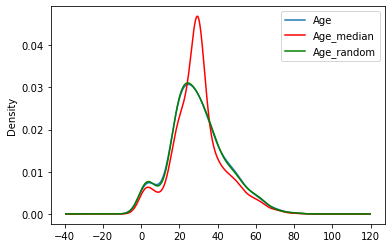

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [50]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
data= pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
data['Age_NAN']=np.where(data['Age'].isnull(),1,0)
data

,Survived,Age,Fare,Age_NAN
0,0,22.00,7.2500,0
1,1,38.00,71.2833,0
2,1,26.00,7.9250,0
3,1,35.00,53.1000,0
4,0,35.00,8.0500,0
5,0,NaN,8.4583,1
6,0,54.00,51.8625,0
7,0,2.00,21.0750,0
8,1,27.00,11.1333,0
9,1,14.00,30.0708,0


In [53]:
data.Age.mean()

29.69911764705882

In [54]:
data.Age.median()

28.0

In [55]:
data['Age'].fillna(data.Age.median(),inplace=True)
data.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [56]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
pd.set_option('Display.max_rows', None)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

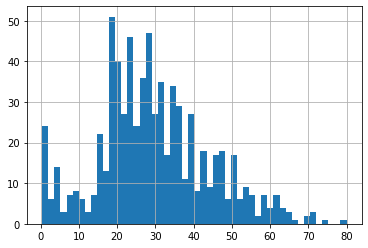

In [57]:
df.Age.hist(bins=50)

In [58]:
extreme = df.Age.mean()+3*df.Age.std()

C:\Users\nagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

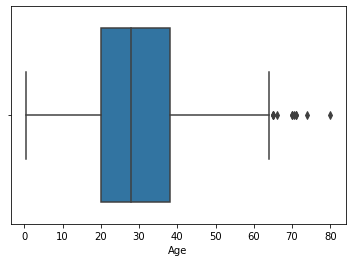

In [59]:
import seaborn as sns
sns.boxplot('Age', data=df)


In [60]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [61]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

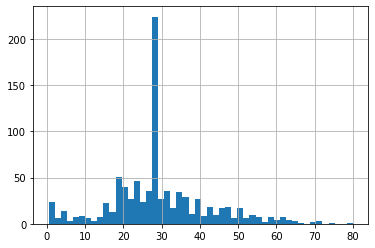

In [62]:
df['Age'].hist(bins=50)

<AxesSubplot:>

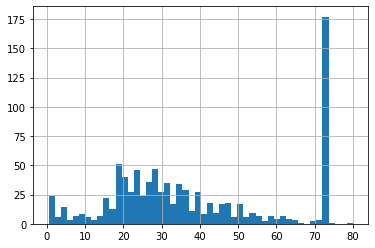

In [63]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\nagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

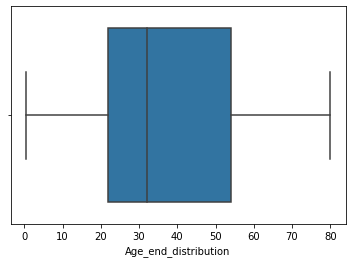

In [64]:
sns.boxplot('Age_end_distribution',data=df)